This notebook trains a neural network with TCGA as the only data seen during training and raw mutations are used as input. 

#### Imports

In [1]:
import pandas as pd
import numpy as np

In [2]:
import sys
sys.path.append("../src/")

In [3]:
import datetime
import logging
import time
import torch
import random

In [4]:
from TcgaClassifierModel import ModelTCGAClassifier

In [5]:
chosen_seed = 42
torch.manual_seed(chosen_seed)
random.seed(chosen_seed)
np.random.seed(chosen_seed)

In [6]:
torch.multiprocessing.set_sharing_strategy('file_system')

### PACLITAXEL

In [7]:
best_parameters = {'ldr': 0.17470638343133033,
 'lr': 0.364041809104383,
 'weight_decay': 0.011509081861004234,
 'momentum': 0.2880509531032294,
 'step_size': 86,
 'loops_train': 150,
 'hd': 4,
 'batch_size': 32,
 'seed': 42}

In [8]:
model_PACLITAXEL = ModelTCGAClassifier('PACLITAXEL', 'mutation')
#  Unable to calculate AUROC for validation set 1
model_PACLITAXEL.get_results(best_parameters)

DomainSpecificNN(
  (feature): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=324, out_features=64, bias=True)
      (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.17470638343133033, inplace=False)
      (4): Linear(in_features=64, out_features=64, bias=True)
      (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU()
      (7): Dropout(p=0.17470638343133033, inplace=False)
      (8): Linear(in_features=64, out_features=64, bias=True)
      (9): Sigmoid()
    )
  )
  (classifier): ClassifierModule(
    (pred): Sequential(
      (0): Linear(in_features=64, out_features=1, bias=True)
    )
  )
)
flags: {'ldr': 0.17470638343133033, 'lr': 0.364041809104383, 'weight_decay': 0.011509081861004234, 'momentum': 0.2880509531032294, 'step_size': 86, 'loops_train': 150, 'hd': 4, 'batch_size': 32, 'seed': 42}
-------PACLITAXEL-------
tcga train set s

/home/nicole/anaconda3/envs/druid/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:877: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


,dataset,length_dataset,value_counts,roc_auc,aupr
0,PDX,8,{0: 8},NaN,-0.000000
0,TCGA,31,"{1: 23, 0: 8}",0.641304,0.860706


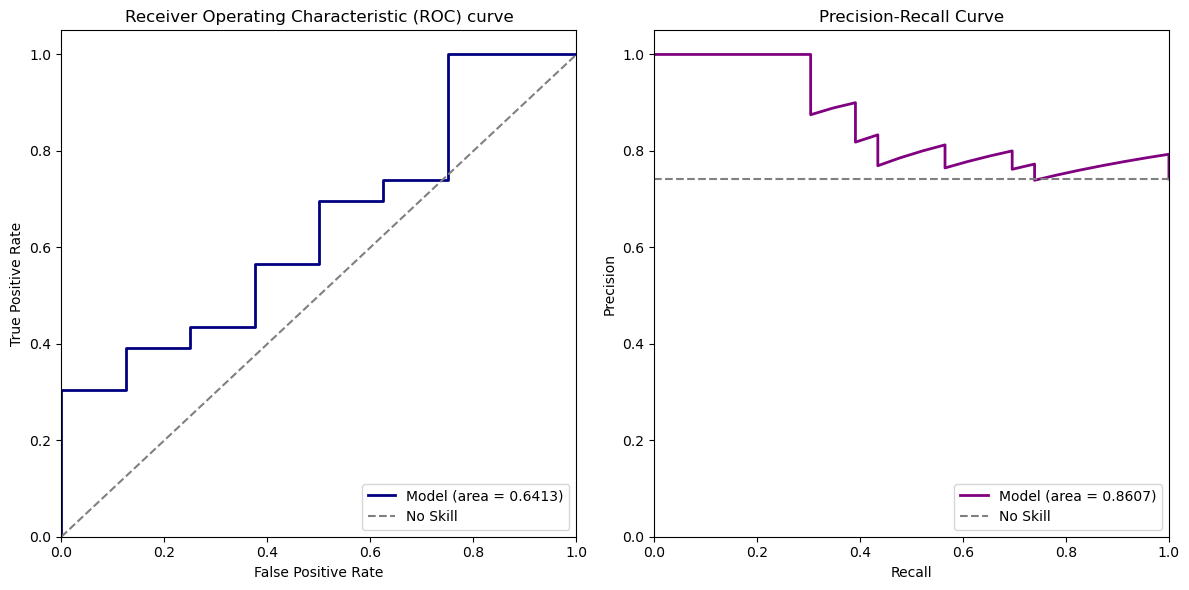

In [9]:
model_PACLITAXEL.get_roc_pr_curves(best_parameters, False, 'tcga')

In [10]:
model_PACLITAXEL.get_train_set_results(best_parameters, False)

,dataset,length_dataset,value_counts,roc_auc,aupr
0,PDX,35,"{0: 30, 1: 5}",0.266667,0.114713
0,TCGA,82,"{1: 53, 0: 29}",0.946649,0.954120


Distribution of Predictions by Model
[0.03905611 0.52032939 0.81588405 0.93450019 0.99492812]
TP: 18, FP: 6, TN: 2, FN: 5


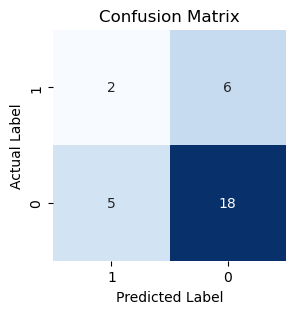

In [11]:
model_PACLITAXEL.plot_confusion_matrix(best_parameters, False, 'tcga', 0.5)

### CISPLATIN

In [12]:
best_parameters = {'ldr': 0.3191498682002547,
 'lr': 0.28565475728158585,
 'weight_decay': 0.03883285794488364,
 'momentum': 0.22576150744825205,
 'step_size': 71,
 'loops_train': 300,
 'hd': 4,
 'batch_size': 32,
 'seed': 42}

In [13]:
model_CISPLATIN = ModelTCGAClassifier('CISPLATIN', 'mutation')
#  Unable to calculate AUROC for validation set 1
model_CISPLATIN.get_results(best_parameters)

DomainSpecificNN(
  (feature): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=324, out_features=64, bias=True)
      (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.3191498682002547, inplace=False)
      (4): Linear(in_features=64, out_features=64, bias=True)
      (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU()
      (7): Dropout(p=0.3191498682002547, inplace=False)
      (8): Linear(in_features=64, out_features=64, bias=True)
      (9): Sigmoid()
    )
  )
  (classifier): ClassifierModule(
    (pred): Sequential(
      (0): Linear(in_features=64, out_features=1, bias=True)
    )
  )
)
flags: {'ldr': 0.3191498682002547, 'lr': 0.28565475728158585, 'weight_decay': 0.03883285794488364, 'momentum': 0.22576150744825205, 'step_size': 71, 'loops_train': 300, 'hd': 4, 'batch_size': 32, 'seed': 42}
-------CISPLATIN-------
tcga train set siz

,dataset,length_dataset,value_counts,roc_auc,aupr
0,TCGA,36,"{1: 27, 0: 9}",0.674897,0.84475


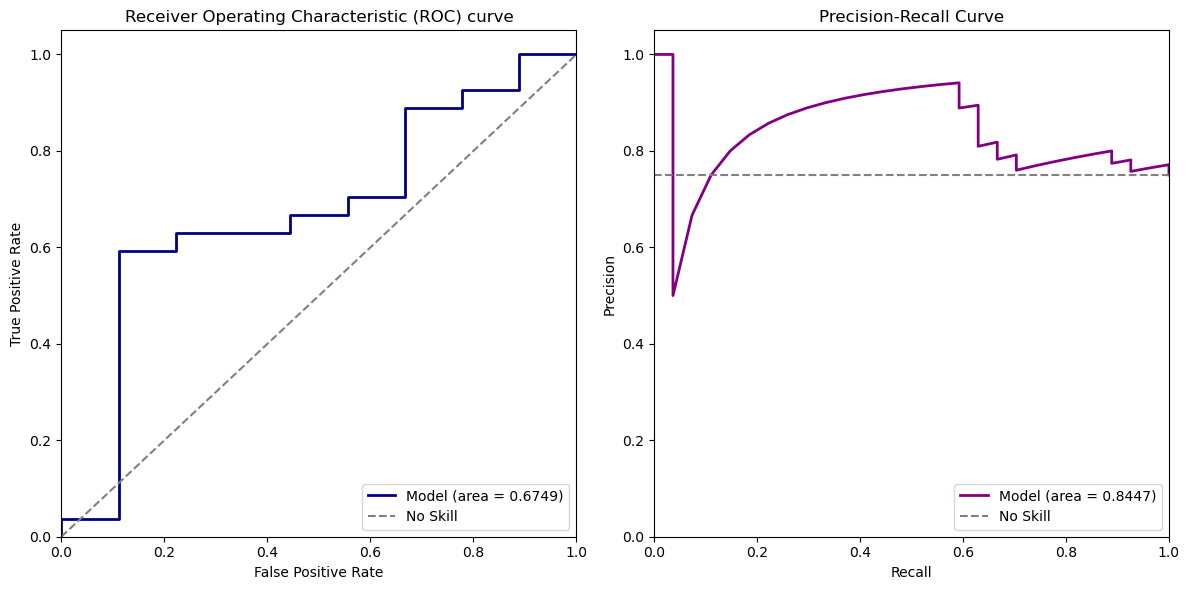

In [14]:
model_CISPLATIN.get_roc_pr_curves(best_parameters, False, 'tcga')

In [15]:
model_CISPLATIN.get_train_set_results(best_parameters, False)

Test set Idx 0 has only response []


,dataset,length_dataset,value_counts,roc_auc,aupr
0,PDX,0,{},NaN,NaN
0,TCGA,170,"{1: 130, 0: 40}",0.964904,0.989642


Distribution of Predictions by Model
[0.67652255 0.78484517 0.82342464 0.83890997 0.86495084]
TP: 27, FP: 9, TN: 0, FN: 0


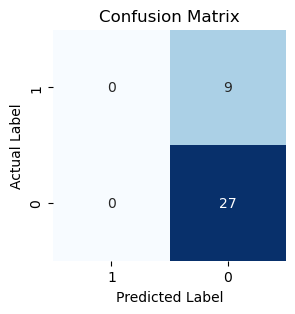

In [16]:
model_CISPLATIN.plot_confusion_matrix(best_parameters, False, 'tcga', 0.5)

## 5-FLUOROURACIL

In [17]:
best_parameters = {'ldr': 0.33678381529451995,
 'batch_size': 64,
 'lr': 0.12793228086259156,
 'weight_decay': 0.03765709286843631,
 'momentum': 0.2538194221085953,
 'step_size': 54,
 'loops_train': 200,
 'hd': 4,
 'seed': 42}

In [18]:
model_5_FLUOROURACIL = ModelTCGAClassifier('5-FLUOROURACIL', 'mutation')
#  Unable to calculate AUROC for validation set 1
model_5_FLUOROURACIL.get_results(best_parameters)

DomainSpecificNN(
  (feature): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=324, out_features=64, bias=True)
      (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.33678381529451995, inplace=False)
      (4): Linear(in_features=64, out_features=64, bias=True)
      (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU()
      (7): Dropout(p=0.33678381529451995, inplace=False)
      (8): Linear(in_features=64, out_features=64, bias=True)
      (9): Sigmoid()
    )
  )
  (classifier): ClassifierModule(
    (pred): Sequential(
      (0): Linear(in_features=64, out_features=1, bias=True)
    )
  )
)
flags: {'ldr': 0.33678381529451995, 'batch_size': 64, 'lr': 0.12793228086259156, 'weight_decay': 0.03765709286843631, 'momentum': 0.2538194221085953, 'step_size': 54, 'loops_train': 200, 'hd': 4, 'seed': 42}
-------5-FLUOROURACIL-------
tcga train 

,dataset,length_dataset,value_counts,roc_auc,aupr
0,TCGA,21,"{1: 17, 0: 4}",0.75,0.917952


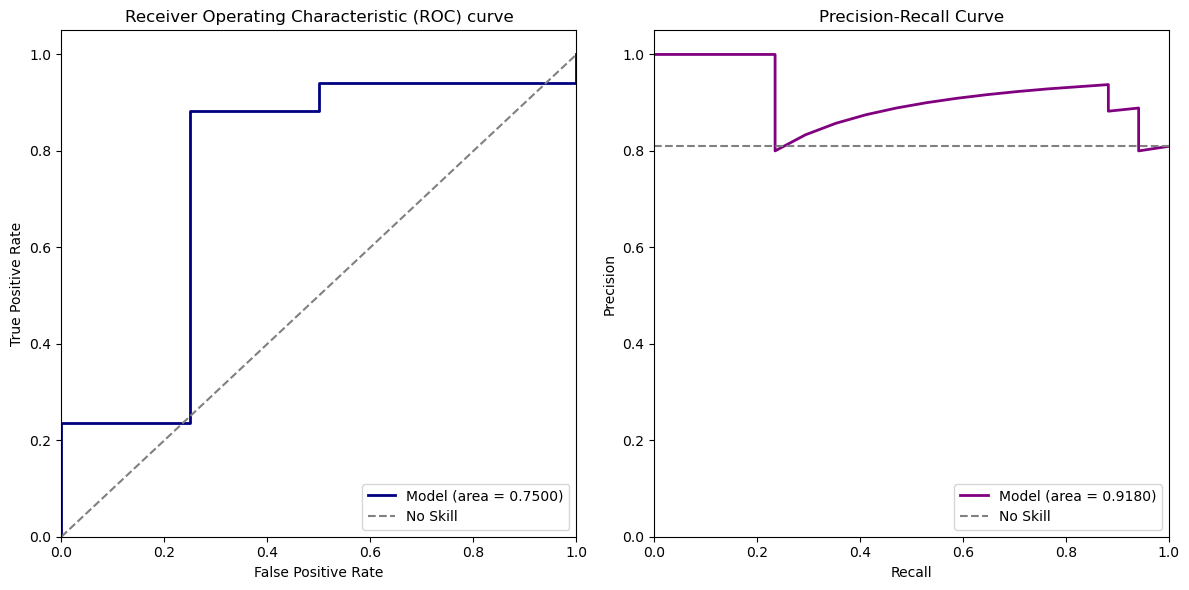

In [19]:
model_5_FLUOROURACIL.get_roc_pr_curves(best_parameters, False, 'tcga')

In [20]:
model_5_FLUOROURACIL.get_train_set_results(best_parameters, False)

Test set Idx 0 has only response []


,dataset,length_dataset,value_counts,roc_auc,aupr
0,PDX,0,{},NaN,NaN
0,TCGA,104,"{1: 65, 0: 39}",0.742012,0.832822


Distribution of Predictions by Model
[0.65486401 0.65557581 0.65575993 0.65614903 0.6564523 ]
TP: 17, FP: 4, TN: 0, FN: 0


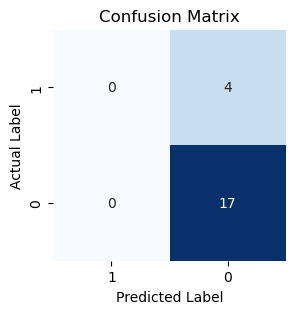

In [21]:
model_5_FLUOROURACIL.plot_confusion_matrix(best_parameters, False, 'tcga', 0.5)

## CYCLOPHOSPHAMIDE

In [22]:
best_parameters = {'ldr': 0.10608799403014862,
 'batch_size': 128,
 'lr': 0.3328635701018629,
 'weight_decay': 0.04629111145673493,
 'momentum': 0.4136806110357524,
 'step_size': 84,
 'loops_train': 500,
 'hd': 3,
 'seed': 42}

In [23]:
model_CYCLOPHOSPHAMIDE = ModelTCGAClassifier('CYCLOPHOSPHAMIDE', 'mutation')
#  Unable to calculate AUROC for validation set 1
model_CYCLOPHOSPHAMIDE.get_results(best_parameters)

DomainSpecificNN(
  (feature): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=324, out_features=128, bias=True)
      (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.10608799403014862, inplace=False)
      (4): Linear(in_features=128, out_features=128, bias=True)
      (5): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU()
      (7): Dropout(p=0.10608799403014862, inplace=False)
      (8): Linear(in_features=128, out_features=128, bias=True)
      (9): Sigmoid()
    )
  )
  (classifier): ClassifierModule(
    (pred): Sequential(
      (0): Linear(in_features=128, out_features=1, bias=True)
    )
  )
)
flags: {'ldr': 0.10608799403014862, 'batch_size': 128, 'lr': 0.3328635701018629, 'weight_decay': 0.04629111145673493, 'momentum': 0.4136806110357524, 'step_size': 84, 'loops_train': 500, 'hd': 3, 'seed': 42}
-------CYCLOPHOSPHAMIDE-------
t

,dataset,length_dataset,value_counts,roc_auc,aupr
0,TCGA,19,"{1: 17, 0: 2}",0.911765,0.990348


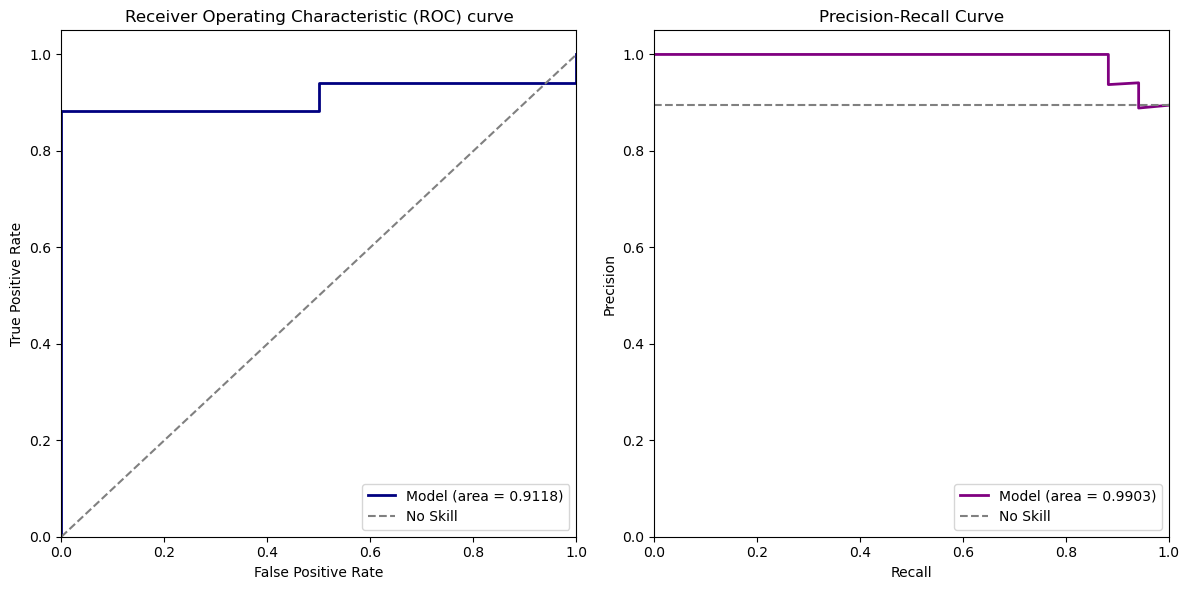

In [24]:
model_CYCLOPHOSPHAMIDE.get_roc_pr_curves(best_parameters, False, 'tcga')

In [25]:
model_CYCLOPHOSPHAMIDE.get_train_set_results(best_parameters, False)

Test set Idx 0 has only response []


,dataset,length_dataset,value_counts,roc_auc,aupr
0,PDX,0,{},NaN,NaN
0,TCGA,50,"{1: 47, 0: 3}",1.0,1.0


Distribution of Predictions by Model
[0.96049196 0.96106014 0.96147346 0.96165213 0.96200716]
TP: 17, FP: 2, TN: 0, FN: 0


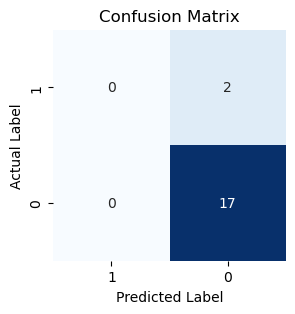

In [26]:
model_CYCLOPHOSPHAMIDE.plot_confusion_matrix(best_parameters, False, 'tcga', 0.5)

## GEMCITABINE

In [27]:
best_parameters = {'ldr': 0.2700066274074122,
 'batch_size': 128,
 'lr': 0.02109626650269737,
 'weight_decay': 0.057376045338568694,
 'momentum': 0.5095666375812657,
 'step_size': 87,
 'loops_train': 300,
 'hd': 1,
 'seed': 42}

In [28]:
model_GEMCITABINE = ModelTCGAClassifier('GEMCITABINE', 'mutation')
#  Unable to calculate AUROC for validation set 1
model_GEMCITABINE.get_results(best_parameters)

DomainSpecificNN(
  (feature): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=324, out_features=512, bias=True)
      (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.2700066274074122, inplace=False)
      (4): Linear(in_features=512, out_features=128, bias=True)
      (5): Sigmoid()
    )
  )
  (classifier): ClassifierModule(
    (pred): Sequential(
      (0): Linear(in_features=128, out_features=1, bias=True)
    )
  )
)
flags: {'ldr': 0.2700066274074122, 'batch_size': 128, 'lr': 0.02109626650269737, 'weight_decay': 0.057376045338568694, 'momentum': 0.5095666375812657, 'step_size': 87, 'loops_train': 300, 'hd': 1, 'seed': 42}
-------GEMCITABINE-------
tcga train set size: 35
tcga validation set size: 9
pdx test set size: 0
tcga test set size: 18
Highest AUROC achieved during training: 0.888888888888889
PDX test set not available
[0.59267414 0.59424474 0.59495732 0.59562272 0.59616564 

,dataset,length_dataset,value_counts,roc_auc,aupr
0,TCGA,18,"{0: 9, 1: 9}",0.604938,0.68721


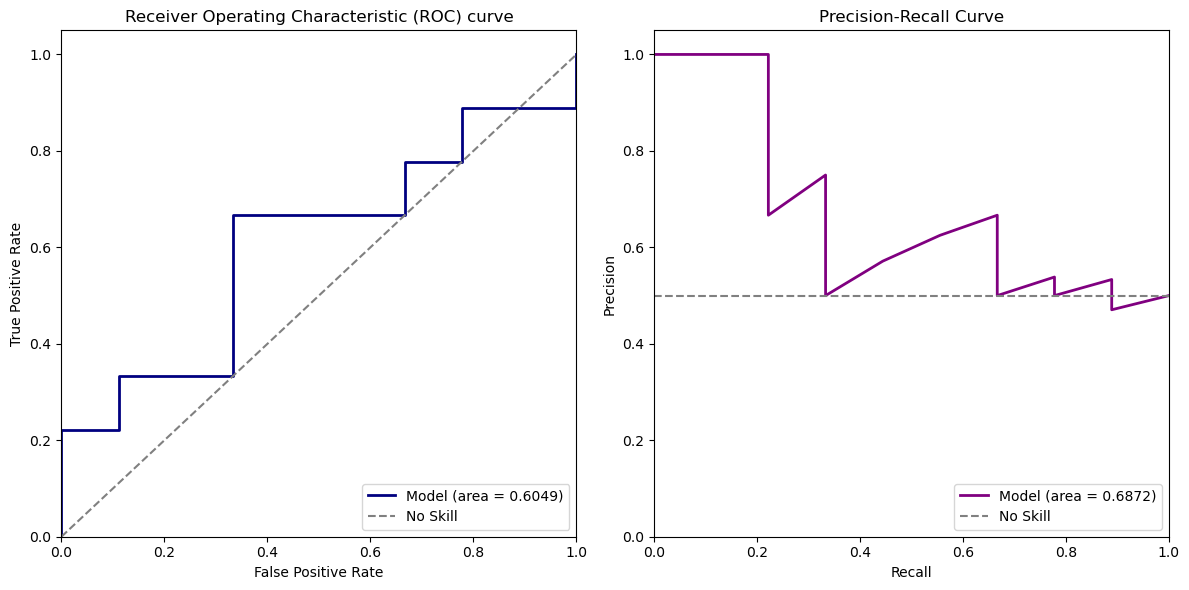

In [29]:
model_GEMCITABINE.get_roc_pr_curves(best_parameters, False, 'tcga')

In [30]:
model_GEMCITABINE.get_train_set_results(best_parameters, False)

Test set Idx 0 has only response []


,dataset,length_dataset,value_counts,roc_auc,aupr
0,PDX,0,{},NaN,NaN
0,TCGA,44,"{1: 27, 0: 17}",0.71024,0.817272


Distribution of Predictions by Model
[0.59267414 0.59495732 0.59562272 0.59616564 0.59957719]
TP: 9, FP: 9, TN: 0, FN: 0


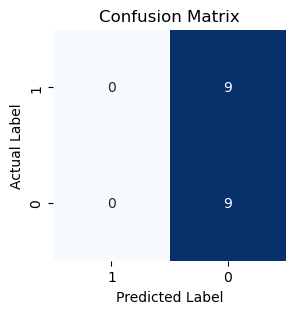

In [31]:
model_GEMCITABINE.plot_confusion_matrix(best_parameters, False, 'tcga', 0.5)